import pandas as pd
!pip install datasets
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [ ]:
import pandas as pd
!pip install datasets
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

AttributeError: module 'pyarrow.lib' has no attribute 'ListViewType'

In [ ]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [ ]:
df['job_title_short'].head()

In [ ]:
df[['job_title_short', 'job_location']]

In [ ]:
#to access 100th row of the data

df.iloc[90] # or
df.iloc[90:100]

In [ ]:
df[df.job_title_short == 'Data Analyst']

In [ ]:
## CLEANING DATA ##

In [ ]:
df.info()
#'job_posted"data is an object

In [ ]:
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)


In [ ]:
df['job_posted_month'] = df.job_posted_date.dt.month
df.info()
df.head()

In [ ]:
df.sort_values('job_posted_date', inplace = True)

In [ ]:
#I want to look closer into salary_hourly avg, I want to first - drop columns and see if there are any NA values

In [ ]:
df.drop(labels = 'salary_hour_avg', axis = 1, inplace = True)
df.info()

# filter NA's
df.dropna(subset = ['salary_year_avg'], inplace = True)


In [ ]:
df.dropna(subset = ['salary_year_avg'], inplace = True)
df.info()

In [ ]:
## PANDAS: ANALYSING df.describe(), len(df)
#!pip install datasets will need to be run if you are starting a new runtime in Colab

import pandas as pd
from datasets import load_dataset

## Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

## Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
df.describe()
df.info()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [ ]:
# Saw that min salary looked suspicious --> investigate further
df['salary_year_avg'].min()
df['salary_year_avg'].max()

960000.0

In [ ]:
min_salary = df['salary_year_avg'].idxmin()
df.iloc[min_salary]

job_title_short                                              Data Engineer
job_title                                           Data Engineer - Hadoop
job_location                                                        Brazil
job_via                                                       via LinkedIn
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     Brazil
job_posted_date                                        2023-12-09 10:05:30
job_no_degree_mention                                                 True
job_health_insurance                                                 False
job_country                                                         Brazil
salary_rate                                                           year
salary_year_avg                                                    15000.0
salary_hour_avg          

In [ ]:
#Count of distinct titles
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [ ]:
# Groupby

df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [ ]:
#When grouping by multiple values, use a list
df.groupby(['job_title_short', 'job_country'])['salary_year_avg'].median()

job_title_short    job_country
Business Analyst   Afghanistan        NaN
                   Albania            NaN
                   Algeria            NaN
                   Angola             NaN
                   Argentina      71100.0
                                   ...   
Software Engineer  Venezuela          NaN
                   Vietnam        53600.0
                   Yemen              NaN
                   Zambia             NaN
                   Zimbabwe           NaN
Name: salary_year_avg, Length: 1387, dtype: float64

In [ ]:
df.groupby('job_title_short')[['salary_year_avg', 'salary_hour_avg']].median()

,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [ ]:
##multiple(aggregate function e.g. min and max)
df.groupby('job_title_short')['salary_year_avg'].agg(['min', 'max'])

,min,max
job_title_short,,
Business Analyst,16500.0,387460.0
Cloud Engineer,42000.0,280000.0
Data Analyst,25000.0,650000.0
Data Engineer,15000.0,525000.0
Data Scientist,27000.0,960000.0
Machine Learning Engineer,30000.0,325000.0
Senior Data Analyst,30000.0,425000.0
Senior Data Engineer,35000.0,425000.0
Senior Data Scientist,45000.0,890000.0


In [ ]:
#Example: Analyse salaries
df['job_country'].value_counts().head(20)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Canada             16029
Mexico             15139
Poland             14793
Portugal           14508
Australia          12955
South Africa       12414
Belgium            12078
Philippines        11786
Ireland            11162
Switzerland         9924
Name: count, dtype: int64

In [ ]:
df['job_country'].isin(['Australia']).any()

True

In [ ]:
aus_jobs_orig = df[df['job_country'] == "Australia"]
aus_jobs_orig

##Not this: aus_jobs = df['job_country'] == "Australia" - above lets you see it in a dataframe

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,"['python', 'sql', 'r', 'java', 'bash', 'react'...","{'analyst_tools': ['tableau'], 'libraries': ['..."
501,Software Engineer,Senior Engineer - Platform Engineering,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-04-01 13:10:30,False,False,Australia,None,NaN,NaN,Slalom Build,"['aws', 'chef', 'puppet', 'ansible', 'terraform']","{'cloud': ['aws'], 'other': ['chef', 'puppet',..."
758,Senior Data Engineer,Senior Data Engineer,"Sydney NSW, Australia",via Trabajo.org,Full-time,False,Australia,2023-03-18 13:15:07,True,False,Australia,None,NaN,NaN,Mirvac,"['aws', 'snowflake', 'azure']","{'cloud': ['aws', 'snowflake', 'azure']}"
1178,Data Engineer,Data Center Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-09 13:38:29,False,False,Australia,None,NaN,NaN,Technical Global Solutions,"['react', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['re..."
1278,Cloud Engineer,Infrastructure Engineer,"Fortitude Valley QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-03-01 13:25:38,False,False,Australia,None,NaN,NaN,Equinix Asia-Pacific,"['powershell', 'sql', 'sql server', 'azure', '...","{'cloud': ['azure', 'aws', 'vmware'], 'databas..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785322,Data Engineer,Data Engineer,"Brisbane QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-01-17 07:05:54,False,False,Australia,None,NaN,NaN,Randstad Technologies Australia,"['sql', 'python', 'r', 'sql server', 'azure', ...","{'analyst_tools': ['ssis', 'ssrs', 'power bi']..."
785333,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via Trabajo.org,Full-time,False,Australia,2023-07-15 06:17:16,True,False,Australia,None,NaN,NaN,Tata Group,"['sql', 'python', 'aws', 'redshift']","{'cloud': ['aws', 'redshift'], 'programming': ..."
785377,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-09 06:15:32,False,False,Australia,None,NaN,NaN,eliiza,"['python', 'scala', 'java', 'nosql', 'aws', 'g...","{'cloud': ['aws', 'gcp', 'bigquery', 'snowflak..."
785430,Data Engineer,Azure Data Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-01-31 06:27:09,False,False,Australia,None,NaN,NaN,Tata Consultancy Services,"['azure', 'power bi']","{'analyst_tools': ['power bi'], 'cloud': ['azu..."


In [ ]:
us_jobs = df['job_country'] == "United States"
us_jobs

#filter NAN values
us_jobs = df[df['job_country'] == "United States"]
us_jobs


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [ ]:
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]
us_jobs


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"['r', 'python', 'sql', 't-sql', 'hadoop', 'spa...","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"['golang', 'scala', 'python', 'java', 'hadoop'...","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [ ]:
us_jobs.groupby('job_title_short')['salary_year_avg'].count() ##OR
us_jobs.groupby('job_title_short').count()
us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median', 'mean', 'max', 'count']).sort_values(by = 'median', ascending = False)

,median,mean,max,count
job_title_short,,,,
Senior Data Scientist,155000.0,159330.432029,475000.0,1241
Machine Learning Engineer,150000.0,154240.382812,315000.0,128
Senior Data Engineer,150000.0,151448.023186,375000.0,1058
Data Scientist,130000.0,139946.707204,960000.0,4553
Software Engineer,130000.0,137964.929588,375000.0,157
Data Engineer,125000.0,134226.676753,525000.0,2915
Cloud Engineer,116100.0,120090.900000,221844.0,20
Senior Data Analyst,110000.0,115729.129954,425000.0,913
Business Analyst,90000.0,96175.447397,387460.0,431


In [ ]:
aus_jobs_orig = df[df['job_country'] == "Australia"]
aus_jobs_orig

##Not this: aus_jobs = df['job_country'] == "Australia" - above lets you see it in a dataframe

,job_posted_date,salary_year_avg,salary_hour_avg
count,12955,74.000000,81.000000
mean,2023-06-29 00:09:55.226939392,118987.574324,23.753086
min,2023-01-01 07:37:19,20000.000000,20.000000
25%,2023-03-21 14:35:14,96773.000000,20.000000
50%,2023-07-18 10:45:35,119250.000000,20.000000
75%,2023-10-02 15:18:13,147500.000000,20.000000
max,2023-12-31 16:07:17,257500.000000,175.000000
std,NaN,42667.221085,20.400693


In [ ]:
#filter NAN values

aus_jobs = aus_jobs_orig[aus_jobs_orig['salary_year_avg'].notna()]
aus_jobs

## build group by method
aus_jobs.groupby('job_title_short').count()

,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_title_short,,,,,,,,,,,,,,,,
Business Analyst,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3
Cloud Engineer,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Data Analyst,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4
Data Engineer,30,30,30,30,30,30,30,30,30,30,30,30,0,30,29,29
Data Scientist,7,7,7,7,7,7,7,7,7,7,7,7,0,7,7,7
Machine Learning Engineer,7,7,7,7,7,7,7,7,7,7,7,7,0,7,7,7
Senior Data Analyst,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2
Senior Data Engineer,9,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9
Senior Data Scientist,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5


In [ ]:
aus_jobs = aus_jobs_orig[aus_jobs_orig['salary_year_avg'].notna()]
aus_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
26330,Senior Data Scientist,Senior Data Scientist,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-01 13:25:22,False,False,Australia,year,157500.0,NaN,Block,"['go', 'snowflake', 'numpy', 'pandas', 'tensor...","{'cloud': ['snowflake'], 'libraries': ['numpy'..."
27637,Data Engineer,Data Engineer - FinOps,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-27 13:25:00,True,False,Australia,year,147500.0,NaN,Atlassian,"['sql', 'python', 'atlassian']","{'other': ['atlassian'], 'programming': ['sql'..."
42522,Data Analyst,Data Analyst / Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-06-29 06:35:56,True,False,Australia,year,135000.0,NaN,Perigon Group,"['sql', 'snowflake', 'tableau']","{'analyst_tools': ['tableau'], 'cloud': ['snow..."
51626,Data Scientist,Data Scientist (Brain-Computer Interface Team),Anywhere,via Wellfound,Full-time,True,Australia,2023-12-20 06:16:49,False,False,Australia,year,160000.0,NaN,AE Studio,"['python', 'aws', 'tensorflow', 'pytorch', 'gi...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
56804,Machine Learning Engineer,Senior Machine Learning Engineer,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-13 06:15:50,False,False,Australia,year,166000.0,NaN,Block,"['java', 'javascript', 'python', 'kotlin', 'ru...","{'databases': ['redis', 'cassandra', 'mysql'],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774527,Cloud Engineer,Customer Success Engineer,Anywhere,via AngelList,Full-time,True,Australia,2023-01-26 02:05:04,True,False,Australia,year,110000.0,NaN,Bigeye,"['sql', 'snowflake', 'redshift', 'bigquery', '...","{'analyst_tools': ['looker', 'tableau'], 'clou..."
775854,Machine Learning Engineer,Machine Learning Engineer,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-01-10 01:19:54,False,False,Australia,year,166000.0,NaN,Anduril Industries,"['python', 'airflow', 'docker']","{'libraries': ['airflow'], 'other': ['docker']..."
777181,Data Engineer,Machine Learning/Data Engineer,Anywhere,via LinkedIn,Full-time,True,Australia,2023-10-23 05:27:08,False,False,Australia,year,120000.0,NaN,Red Marker,"['python', 'sql', 'pandas', 'numpy', 'nltk', '...","{'libraries': ['pandas', 'numpy', 'nltk', 'ten..."
778270,Software Engineer,Senior Software Engineer (Data Visualisation),"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-08-08 05:50:43,True,False,Australia,year,79200.0,NaN,Neara,"['html', 'css', 'sass', 'swift', 'react', 'ang...","{'libraries': ['react'], 'programming': ['html..."


In [ ]:
aus_jobs_nan = aus_jobs_orig[aus_jobs_orig['salary_year_avg'].notna()]
aus_jobs_nan



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
26330,Senior Data Scientist,Senior Data Scientist,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-01 13:25:22,False,False,Australia,year,157500.0,NaN,Block,"['go', 'snowflake', 'numpy', 'pandas', 'tensor...","{'cloud': ['snowflake'], 'libraries': ['numpy'..."
27637,Data Engineer,Data Engineer - FinOps,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-27 13:25:00,True,False,Australia,year,147500.0,NaN,Atlassian,"['sql', 'python', 'atlassian']","{'other': ['atlassian'], 'programming': ['sql'..."
42522,Data Analyst,Data Analyst / Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-06-29 06:35:56,True,False,Australia,year,135000.0,NaN,Perigon Group,"['sql', 'snowflake', 'tableau']","{'analyst_tools': ['tableau'], 'cloud': ['snow..."
51626,Data Scientist,Data Scientist (Brain-Computer Interface Team),Anywhere,via Wellfound,Full-time,True,Australia,2023-12-20 06:16:49,False,False,Australia,year,160000.0,NaN,AE Studio,"['python', 'aws', 'tensorflow', 'pytorch', 'gi...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
56804,Machine Learning Engineer,Senior Machine Learning Engineer,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-13 06:15:50,False,False,Australia,year,166000.0,NaN,Block,"['java', 'javascript', 'python', 'kotlin', 'ru...","{'databases': ['redis', 'cassandra', 'mysql'],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774527,Cloud Engineer,Customer Success Engineer,Anywhere,via AngelList,Full-time,True,Australia,2023-01-26 02:05:04,True,False,Australia,year,110000.0,NaN,Bigeye,"['sql', 'snowflake', 'redshift', 'bigquery', '...","{'analyst_tools': ['looker', 'tableau'], 'clou..."
775854,Machine Learning Engineer,Machine Learning Engineer,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-01-10 01:19:54,False,False,Australia,year,166000.0,NaN,Anduril Industries,"['python', 'airflow', 'docker']","{'libraries': ['airflow'], 'other': ['docker']..."
777181,Data Engineer,Machine Learning/Data Engineer,Anywhere,via LinkedIn,Full-time,True,Australia,2023-10-23 05:27:08,False,False,Australia,year,120000.0,NaN,Red Marker,"['python', 'sql', 'pandas', 'numpy', 'nltk', '...","{'libraries': ['pandas', 'numpy', 'nltk', 'ten..."
778270,Software Engineer,Senior Software Engineer (Data Visualisation),"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-08-08 05:50:43,True,False,Australia,year,79200.0,NaN,Neara,"['html', 'css', 'sass', 'swift', 'react', 'ang...","{'libraries': ['react'], 'programming': ['html..."


In [ ]:
na_count = aus_jobs_orig['salary_year_avg'].isna().sum()

# Count non-NaN values
non_na_count = aus_jobs_orig['salary_year_avg'].notna().sum()

print("NaN count:", na_count)
print("Non-NaN count:", non_na_count)

NaN count: 12881
Non-NaN count: 74


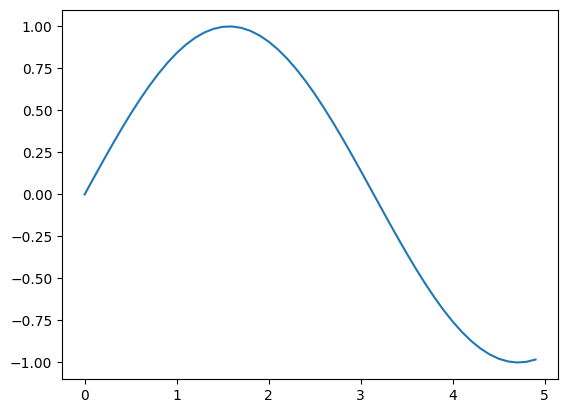

In [ ]:
## !pip list to get list of libraries already installed - matplotlib is already installed
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

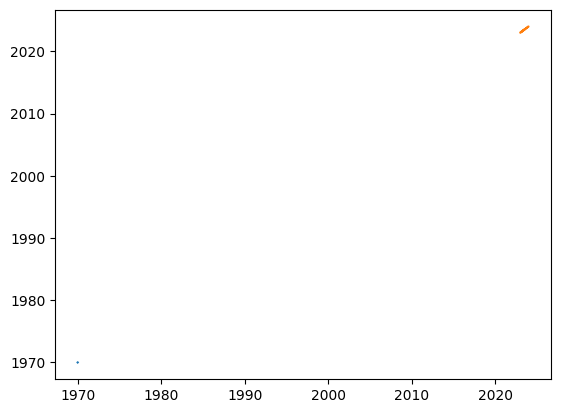

In [ ]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]
plt.plot(x, y)
plt.show

## our data:

df.job_posted_date.head()
plt.plot(df.job_posted_date, df.job_posted_date)

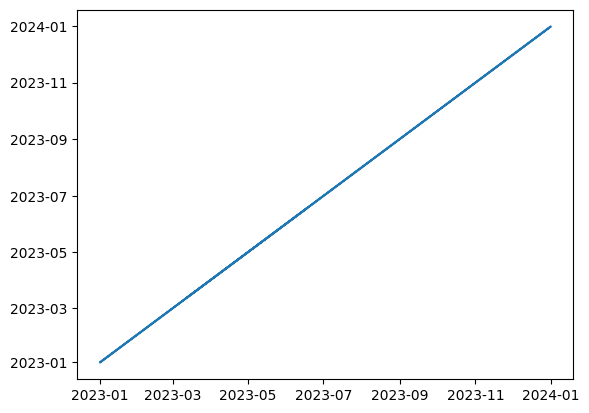

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.job_posted_date.head()
plt.plot(df.job_posted_date, df.job_posted_date)

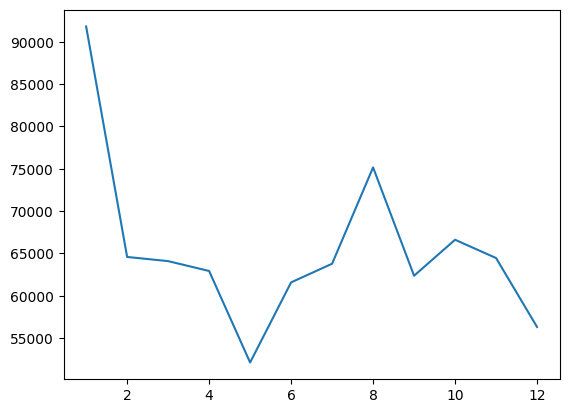

In [ ]:
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index()
##need to be group it by month for better visual
df['job_posted_month'] = df['job_posted_date'].dt.month
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

plt.plot(monthly_counts.index, monthly_counts)

<BarContainer object of 10 artists>

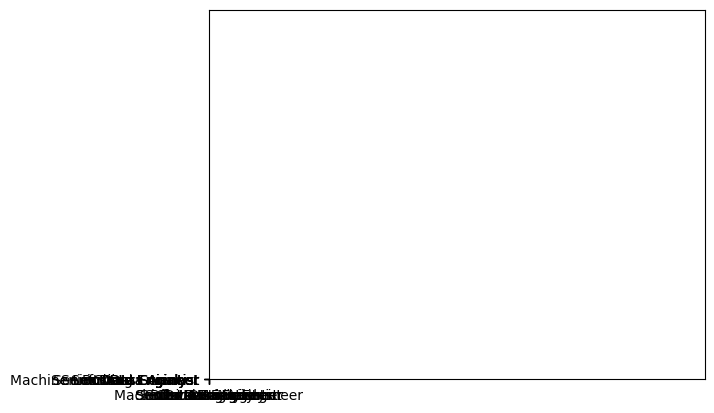

In [ ]:
## Bar chart

job_counts = df.job_title_short.value_counts()
plt.bar(job_counts.index, job_counts) # or
plt.barh(job_counts.index, job_counts) # for horizontal

<BarContainer object of 10 artists>

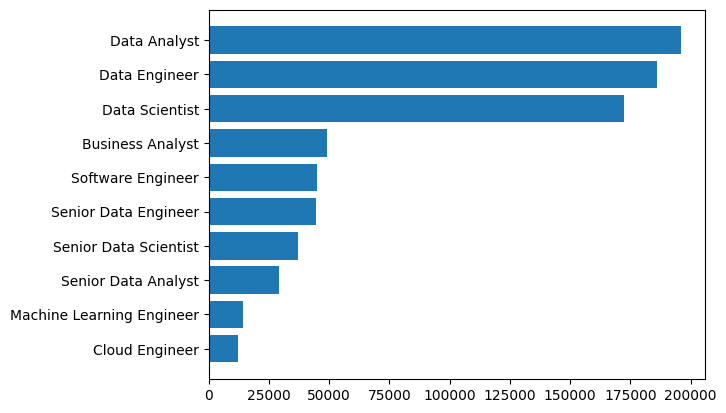

In [ ]:
job_counts = job_counts.sort_values(ascending = True)
plt.barh(job_counts.index, job_counts)

<BarContainer object of 3 artists>

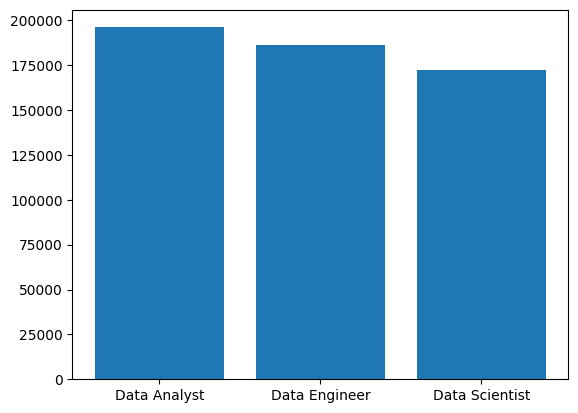

In [ ]:
job_counts = df.job_title_short.value_counts().head(3)
plt.bar(job_counts.index, job_counts)


<BarContainer object of 10 artists>

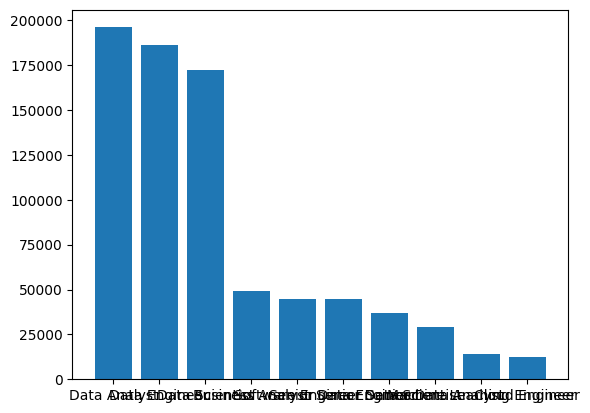

In [ ]:
#Matplotlib: Labeling